In [1]:
# Importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Analisando TED TALKS

O dataset de TED TALKS está disponível em https://www.kaggle.com/code/ashishjangra27/ted-talk-analysis/data#


In [2]:
 df = pd.read_csv('C:/Users/faabr/Downloads/data.csv')


In [3]:
# Aqui verificamos os tipos de dados presentes  no dataset, se há presença de dados nulos em alguma das colunas, além de termos informação sobre o tamanho do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


# Quais autores possuem mais TED TALKS?

In [4]:
teds_por_autores = df.groupby(['author']).size().reset_index(name='teds')
autores_com_mais_teds = teds_por_autores.sort_values("teds").tail(10)

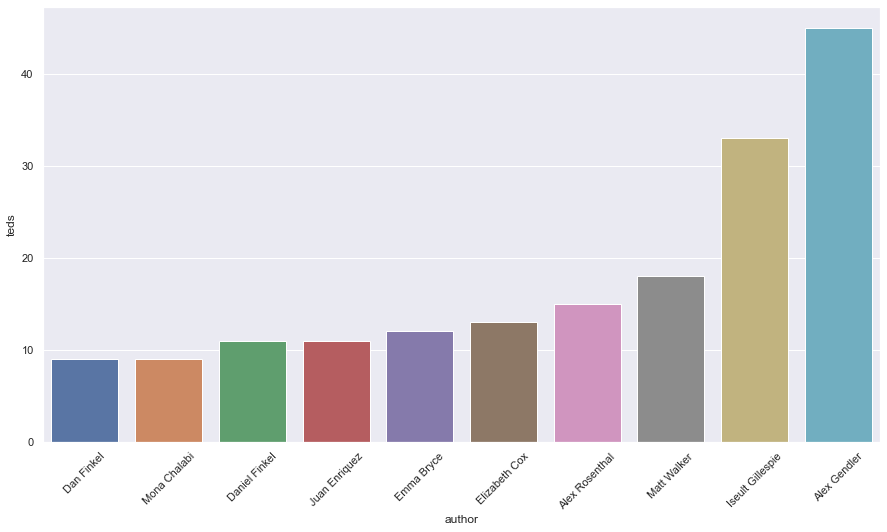

In [5]:
sns.set_theme()
plt.figure(figsize=(15,8))
ax = sns.barplot(x="author", y="teds", data=autores_com_mais_teds)
ax.tick_params(axis='x', rotation=45)

Nota-se que Alex Gendler é o autor com mais TEDs publicados, com um total de 45 trabalhos, seguido por Iseult Gillespie, sendo os autores que mais se destacam

# Quais TEDs possuem mais views?

In [6]:
teds_por_views = df.groupby(['author']).sum(['views','likes'])


# Quais autores mais viralizaram?

considerando viralizar o ato de se tornar muito visto e/ou muito compartilhado, vamos visualizar a situação dos talkers tendo em vista a quantidade de ted publicados.

In [7]:
left_merged = pd.merge(
...     teds_por_views, teds_por_autores, how="left", on=["author"])

In [8]:

import plotly.express as px

fig = px.scatter(left_merged, x="views", y="teds", color="likes",hover_data=['author'])
fig.show()


pode-se notar que Alex Gendler segue sendo o autor com maior numero tanto de visualização quanto de likes, mas não podemos esquecer de levar em consideração que muito disso se deve a grandeza de todos os seus número ser elevada, sendo também o autor com mais ted publicados.
Desta forma, pode-se dizer que Sir Ken Robinson segue como o autor mais viralizado tendo em vista que é o mais visualizado para a quantidade de Teds publicados.

In [9]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True, errors='coerce')

In [10]:
teds_max = df.groupby(['author']).max(['views','likes'])


In [11]:
dados = pd.merge(
...     teds_max, teds_por_autores, how="left", on=["author"])

In [12]:
fig = px.scatter(dados, x="views", y="teds",hover_data=['author'])
fig.show()


um ponto já conhecido, mas que fica evidente olhando os dados é o fato do Ted talks focar esforços em diversidade de conteúdo, pode-se notar pela baixa quantidade de autores com mais de um projeto. Analisando o maior valor de um TED para cada autor, temos que Sir ken Robinson é o autor com mais views em um único TED, e de forma surpreendente temos alex Gendler muito distante da posição que se imaginaria que ele ocupasse tem em vista o tamanho de seus números globais.